<a href="https://colab.research.google.com/github/Gaurav2002-developer/Apple-Stock-Price-Prediction/blob/Rahul-Workflow/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Libraries

In [1]:
!pip install pmdarima xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 7.8 MB/s eta 0:00:00


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

import pmdarima as pm
from xgboost import XGBRegressor


In [7]:
df = pd.read_csv('AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


Train–Test Split

In [8]:
data = df[['Close']]

train = data[:-30]   # all except last 30 days
test  = data[-30:]   # last 30 days


ARIMA

In [9]:
arima_model = pm.auto_arima(train, seasonal=False, trace=False)
arima_model


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [10]:
arima_pred = arima_model.predict(n_periods=30) #predict 30 days


ARIMA Accuracy

In [11]:
rmse_arima = sqrt(mean_squared_error(test, arima_pred))
mae_arima  = mean_absolute_error(test, arima_pred)

print("ARIMA RMSE:", rmse_arima)
print("ARIMA MAE:", mae_arima)


ARIMA RMSE: 11.588757589344079
ARIMA MAE: 8.558665339798143


XGBoost

In [12]:
df_ml = df[['Close']].copy()
df_ml['Lag1'] = df_ml['Close'].shift(1)
df_ml = df_ml.dropna()


Split

In [13]:
train_ml = df_ml[:-30]
test_ml  = df_ml[-30:]

X_train = train_ml[['Lag1']]
y_train = train_ml['Close']

X_test  = test_ml[['Lag1']]
y_test  = test_ml['Close']


Train XGBoost

In [14]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [15]:
xgb_pred = xgb.predict(X_test)


Evaluate

In [16]:
rmse_xgb = sqrt(mean_squared_error(y_test, xgb_pred))
mae_xgb  = mean_absolute_error(y_test, xgb_pred)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost MAE:", mae_xgb)


XGBoost RMSE: 15.038320336603515
XGBoost MAE: 11.937270098177084


Compare Models

In [17]:
results = pd.DataFrame({
    'Model': ['ARIMA', 'XGBoost'],
    'RMSE': [rmse_arima, rmse_xgb],
    'MAE':  [mae_arima, mae_xgb]
})

results


,Model,RMSE,MAE
0,ARIMA,11.588758,8.558665
1,XGBoost,15.038320,11.937270


Plot Predictions

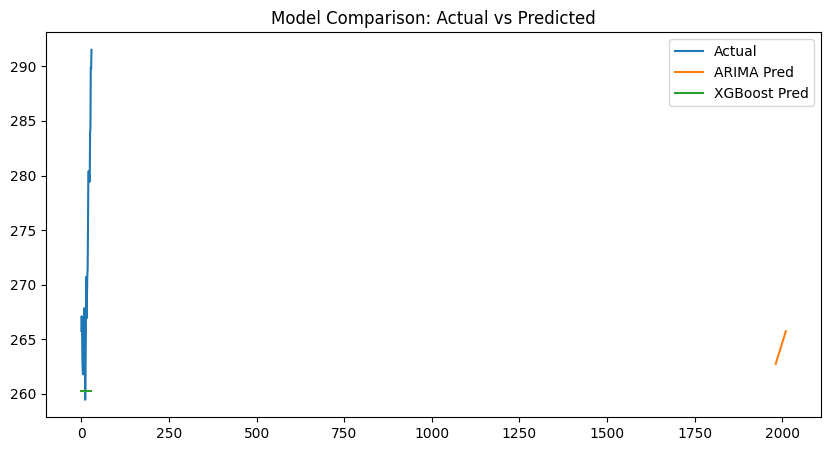

In [18]:
plt.figure(figsize=(10,5))
plt.plot(test.values, label='Actual')
plt.plot(arima_pred, label='ARIMA Pred')
plt.plot(xgb_pred, label='XGBoost Pred')
plt.legend()
plt.title("Model Comparison: Actual vs Predicted")
plt.show()


In [19]:
future_30 = arima_model.predict(n_periods=30)
future_30


,0
1981,262.742991
1982,262.845967
1983,262.948944
1984,263.051920
1985,263.154896
1986,263.257872
1987,263.360848
1988,263.463825
1989,263.566801
1990,263.669777
